# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

Pavi Gupta, tgz5gw

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [38]:
import pandas as pd
import numpy as np

# Question 1
airbnb = pd.read_csv('data/airbnb_NYC.csv', encoding='latin1')

airbnb['Price'] = airbnb['Price'].replace('[\\$,]', '', regex=True).astype(float)

missing_price = airbnb['Price'].isna().sum()
print(f"Missing values in Price: {missing_price}")

Missing values in Price: 0


The values in the "Price" column were strings that had commas. Python can't turn commas into numbers, and it will create an error, so I removed the commas.

In [7]:
# Question 2
mn_police = pd.read_csv('data/mn_police_use_of_force.csv')

prop_missing = mn_police['subject_injury'].isna().mean()
print(pd.crosstab(mn_police['force_type'], mn_police['subject_injury'], dropna=False, margins=True))

mn_police['subject_injury'] = mn_police['subject_injury'].fillna('Missing')

subject_injury                 No   Yes   NaN    All
force_type                                          
Baton                           0     2     2      4
Bodily Force                 1093  1286  7051   9430
Chemical Irritant             131    41  1421   1593
Firearm                         2     0     0      2
Gun Point Display              33    44    27    104
Improvised Weapon              34    40    74    148
Less Lethal                     0     0    87     87
Less Lethal Projectile          1     2     0      3
Maximal Restraint Technique     0     0   170    170
Police K9 Bite                  2    44    31     77
Taser                         150   172   985   1307
All                          1446  1631     0  12925


In [43]:
mn_police['subject_injury'].value_counts(dropna = False)

subject_injury
Missing    9848
Yes        1631
No         1446
Name: count, dtype: int64

The proportion of missing values in 0.76. There are not any clear patterns in the data for "Missing."

In [44]:
# Question 3
metabric = pd.read_csv('data/metabric.csv')

mapping = {'Living': 1, 'Deceased': 0}
metabric['Survival_Status_Dummy'] = metabric['Overall Survival Status'].map(mapping)
metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage,Survival_Status_Dummy
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0,NaN
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0,NaN
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0,NaN
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0,NaN
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0,NaN


In [9]:
# Question 4
missing_reviews = airbnb['Review Scores Rating'].isna().sum()
print(f"Missing values in Review Scores Rating: {missing_reviews}")

median_score = airbnb['Review Scores Rating'].median()
airbnb['Review_Scores_Imputed'] = airbnb['Review Scores Rating'].fillna(median_score)

Missing values in Review Scores Rating: 8323


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [40]:
import matplotlib.pyplot as plt
import re

# Question 1
df = pd.read_excel('GSAF5.xls')
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df = df.dropna(axis=1, how='all')
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Question 3: An observation is a single case of the data. It is represented by a single row in the data set. For this dataset, we can see that an observation represents and singular shark attack. We do not drop single rows of the data, but this can affect statistics such as the median and mean when we are analyzing it.

In [52]:
# Question 4
def clean_year(x):
    try:
        val = float(x)
        return val if val > 1500 else np.nan
    except:
        return np.nan

df['Year_Clean'] = df['Year'].apply(clean_year)
# Filter for attacks since 1940
df_recent = df[df['Year_Clean'] >= 1940].copy()
df['Year_Clean'].head()

0    2026.0
1    2026.0
2    2026.0
3    2026.0
4    2026.0
Name: Year_Clean, dtype: float64

In [51]:
df['Year'].min(), df['Year'].max()

(np.float64(0.0), np.float64(2026.0))

Attacks seem to be generally increasing overtime throughout the range of years 5-2026.

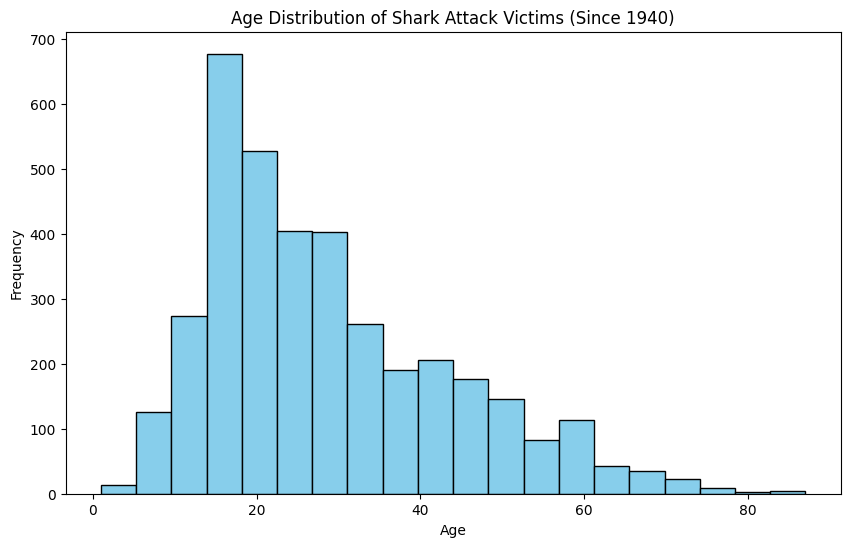

In [53]:
# Question 5
def clean_age(x):
    if pd.isna(x): return np.nan
    match = re.search(r'\d+', str(x))
    return int(match.group()) if match else np.nan

df_recent['Age_Clean'] = df_recent['Age'].apply(clean_age)

# Plotting the Histogram
plt.figure(figsize=(10, 6))
df_recent['Age_Clean'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Shark Attack Victims (Since 1940)')
plt.xlabel('Age')
plt.show()

In [55]:
# Question 6
df['Type'].unique()

array(['Unprovoked', 'Provoked', 'Questionable', 'unprovoked',
       ' Provoked', 'Watercraft', 'Sea Disaster', nan, '?', 'Unconfirmed',
       'Unverified', 'Invalid', 'Under investigation', 'Boat'],
      dtype=object)

In [56]:
df["Type"] = df["Type"].str.strip().str.capitalize()
df.loc[~df["Type"].isin(["Unprovoked", "Provoked"]), "Type"] = "Unknown"
df["Type"].value_counts()

Type
Unprovoked    5226
Unknown       1204
Provoked       644
Name: count, dtype: int64

The proportion of unprovoked attacks is 0.74.

In [58]:
# Question 7
df['Fatal Y/N'].unique()
df["Fatal Y/N"] = df["Fatal Y/N"].str.strip().str.capitalize()
df.loc[~df["Fatal Y/N"].isin(["Y", "N"]), "Fatal Y/N"] = "Unknown"
df["Fatal Y/N"].value_counts()

Fatal Y/N
N          4942
Y          1489
Unknown     643
Name: count, dtype: int64

In [59]:
fatal_by_type = pd.crosstab(df["Type"], df["Fatal Y/N"])
fatal_by_type

Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,614,9,21
Unknown,449,555,200
Unprovoked,3879,79,1268


 Question 8: Based on the data, it seems that an attack is more likely to be fatal when it is unprovoked. This is likely because when the shark is unprovoked and it attacks, it's looking for prey/hunting, so if the wounds it leaves are fetal it's because it was trying to kill the person.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about data tidying. Data tidying is apart of data cleaning, which is important for data scientists as this makes it easier for them to work with the data.
2. The "tidy data standard" intends to facilitate exploration and analysis of data in its beginning stages, as well as simplify the development of analysis tools.
3. The sentence comparing families to tidy datasets means that just like families, datasets have a lot of variety and aspects that make them "messy," hence the importance of datat tidying. The second sentence says that observations and variables can be differentiated, but it comes in different forms for all datasets, as they are all very different and do not have the same definitions.
4. In Section 2.2, Wickham defines values as the numbers/strings that make up the dataset. Variables contain all the values that measure the same underlying attribute across the units. Observations have all values measured on the same unit across attributes. 
5. In Section 2.3, tidy data is defined as a way of mapping the meaning of a dataset to its structure. Each variable forms a column, and each observation forms a row. Each type of observational unit forms a table.
6. The five most common problems with messy datasets:
- Variables are store in both rows and columns
- Multiple variables are store in one column
- Column headers are values, not variable names
- Multiple types of observational unity are stored in the same table
- A single observational unit is stored in multiple tables

The data in Table 4 is messy because the variables form the rows and the columns. The column headers are supposed to be variable names, not values. Melting a dataset is when the columns turn into rows.
7. Table 11 is considered messy because the days of the month are in the column instead of the row. This is making blank spaces in the table. Meanwhile, table 12 is considered tidy and molten because there is one variable per column, and each rows is a day's observations.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

In [62]:
# Question 1
df = pd.read_csv('data/ForeignGifts_edu.csv', encoding='latin1')
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


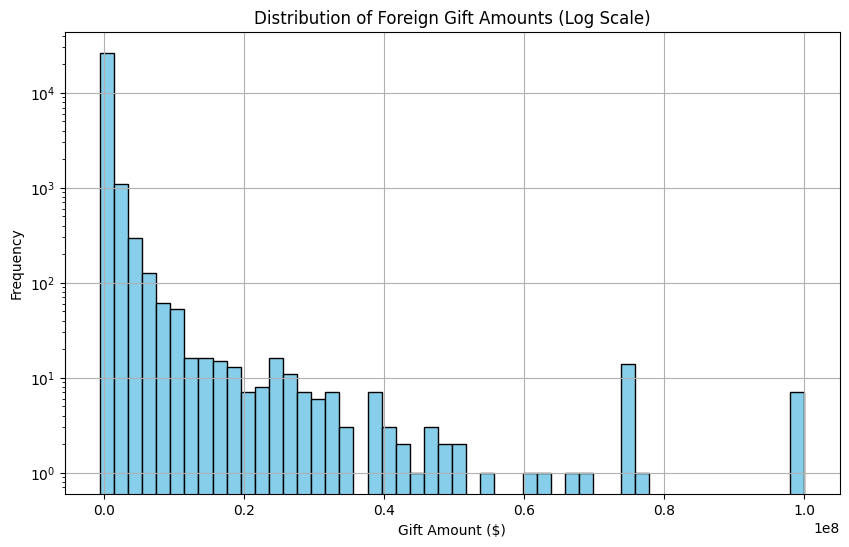

In [64]:
# Question 2
amount_desc = df['Foreign Gift Amount'].describe()
print(amount_desc)

plt.figure(figsize=(10, 6))
df['Foreign Gift Amount'].hist(bins=50, color='skyblue', edgecolor='black')
plt.yscale('log') 
plt.title('Distribution of Foreign Gift Amounts (Log Scale)')
plt.xlabel('Gift Amount ($)')
plt.ylabel('Frequency')
plt.show()

Describe your findings: The numbers and graph prove that the data is extremely skewed to the right. Most of the price of the gifts were on the lower end of the range, with fewer on the high. This shows that most people spend less on these gifts.

In [22]:
# Question 3
gift_type_counts = df['Gift Type'].value_counts()
gift_type_proportions = df['Gift Type'].value_counts(normalize=True)
print(gift_type_proportions)

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


In [23]:
# Question 4
top_countries_by_count = df.groupby('Country of Giftor').size().sort_values(ascending=False).head(15)
top_countries_by_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

print("Top 15 by Number of Gifts:")
print(top_countries_by_count)
print("\nTop 15 by Total Amount ($):")
print(top_countries_by_amount)

Top 15 by Number of Gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64

Top 15 by Total Amount ($):
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Fore

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


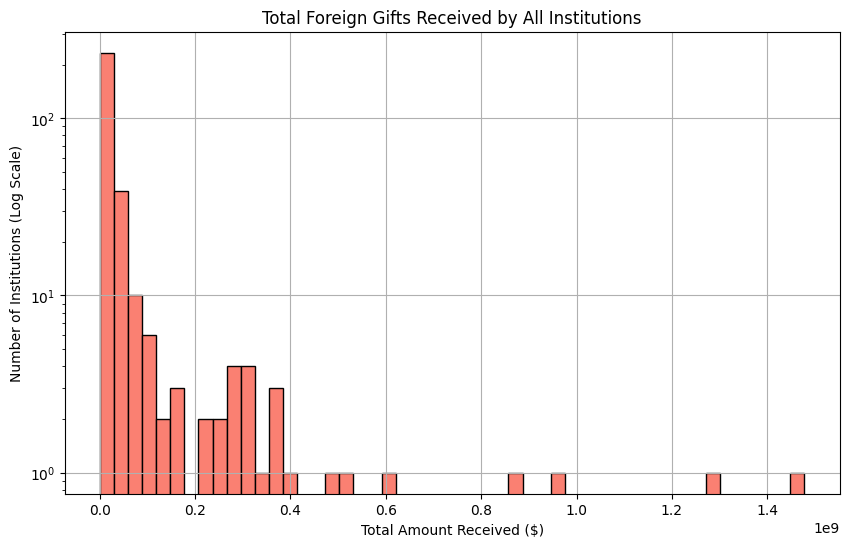

In [24]:
# Question 5
inst_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
top_institutions = inst_totals.sort_values(ascending=False).head(15)
print(top_institutions)

plt.figure(figsize=(10, 6))
inst_totals.hist(bins=50, color='salmon', edgecolor='black')
plt.yscale('log')
plt.title('Total Foreign Gifts Received by All Institutions')
plt.xlabel('Total Amount Received ($)')
plt.ylabel('Number of Institutions (Log Scale)')
plt.show()

In [25]:
# Question 6
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_giftors)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [67]:
import seaborn as sns

# Question 1
df = pd.read_csv('data/college_completion.csv', encoding='latin1')

In [68]:
# Question 2
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [70]:
df.shape

(3798, 63)

In [29]:
# Question 3
ctab = pd.crosstab(df['control'], df['level'])
print("\nCross-tabulation of Control vs. Level:")
print(ctab)


Cross-tabulation of Control vs. Level:
level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


Here, we can see that there are a lot more 4-year colleges overall. There are more 4-year colleges for private schools total, and more 2-year colleges that are public.

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


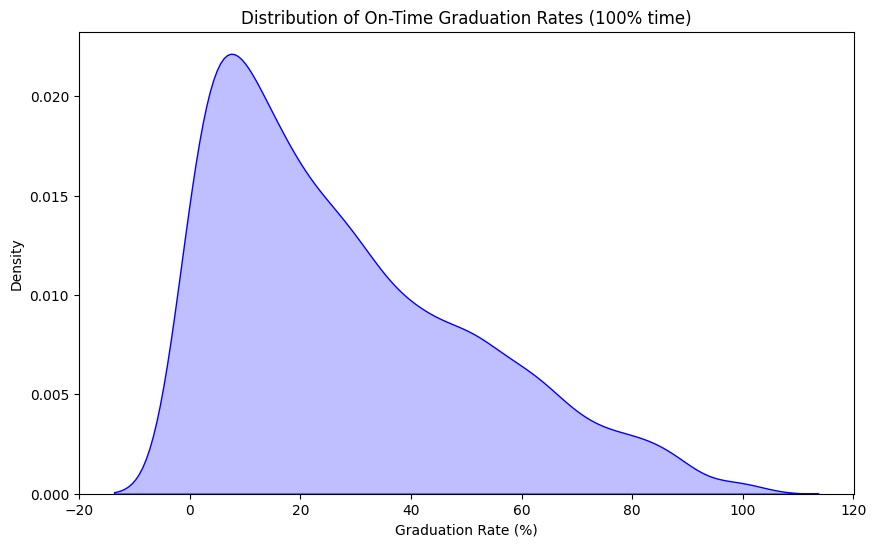

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


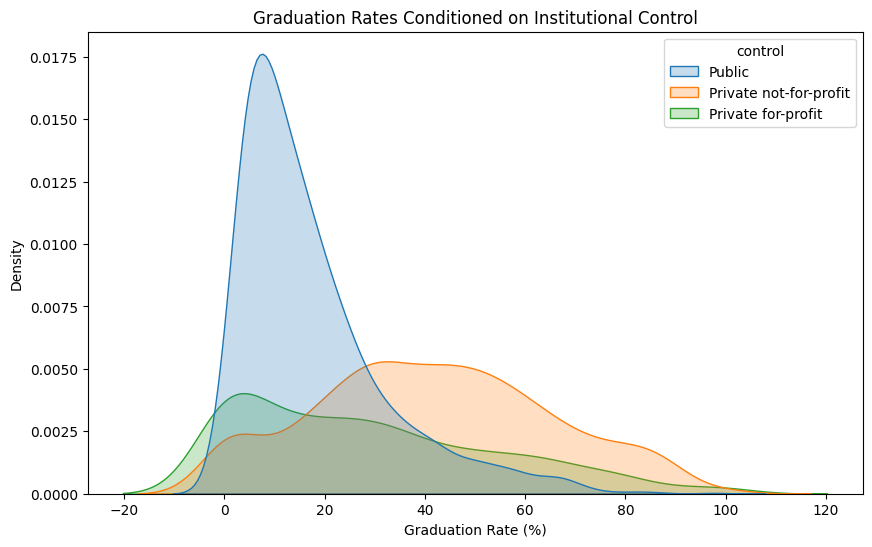

In [30]:
# Question 4
print(df['grad_100_value'].describe())

# Global Kernel Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['grad_100_value'].dropna(), fill=True, color="blue")
plt.title('Distribution of On-Time Graduation Rates (100% time)')
plt.xlabel('Graduation Rate (%)')
plt.show()

print(df.groupby('control')['grad_100_value'].describe())

# Conditional Kernel Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True)
plt.title('Graduation Rates Conditioned on Institutional Control')
plt.xlabel('Graduation Rate (%)')
plt.show()

Private, not-for-profit institutions seems to have higher graduation rates.

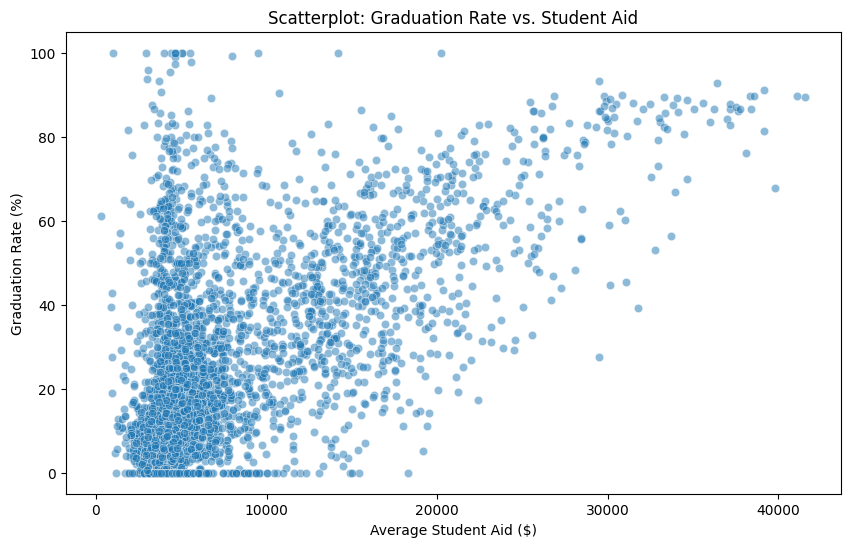


Global Statistics:
Correlation: 0.5759
Covariance: 88610.4832


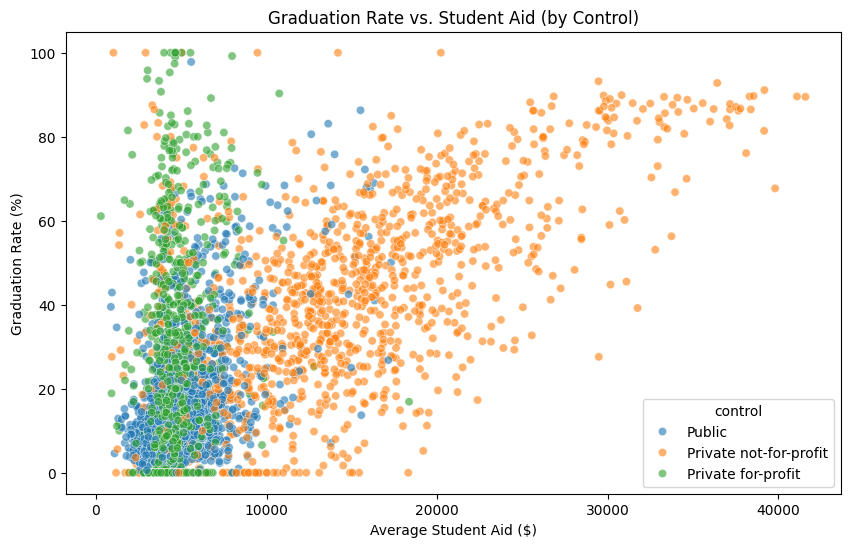


Correlation and Covariance by Institutional Control:
Public: Correlation = 0.4825, Covariance = 15355.1462
Private not-for-profit: Correlation = 0.6016, Covariance = 109274.1233
Private for-profit: Correlation = 0.1884, Covariance = 6897.5250


In [31]:
# Question 5
clean_df = df.dropna(subset=['grad_100_value', 'aid_value'])

# Global Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='aid_value', y='grad_100_value', alpha=0.5)
plt.title('Scatterplot: Graduation Rate vs. Student Aid')
plt.xlabel('Average Student Aid ($)')
plt.ylabel('Graduation Rate (%)')
plt.show()

# Global Correlation and Covariance
global_corr = clean_df['aid_value'].corr(clean_df['grad_100_value'])
global_cov = clean_df['aid_value'].cov(clean_df['grad_100_value'])
print(f"\nGlobal Statistics:")
print(f"Correlation: {global_corr:.4f}")
print(f"Covariance: {global_cov:.4f}")

# Conditional Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='aid_value', y='grad_100_value', hue='control', alpha=0.6)
plt.title('Graduation Rate vs. Student Aid (by Control)')
plt.xlabel('Average Student Aid ($)')
plt.ylabel('Graduation Rate (%)')
plt.show()

# Conditional Statistics
print("\nCorrelation and Covariance by Institutional Control:")
for ctrl_type in clean_df['control'].unique():
    subset = clean_df[clean_df['control'] == ctrl_type]
    corr = subset['aid_value'].corr(subset['grad_100_value'])
    cov = subset['aid_value'].cov(subset['grad_100_value'])
    print(f"{ctrl_type}: Correlation = {corr:.4f}, Covariance = {cov:.4f}")

Based on the graphs above, we can see that there is a positive correlation between graduation and receiving financial aid. However, there are bigger clusters of data at the lower ends of the graph, meaning most schools only offer smaller financial aid packages, and therefore tend to have lower graduation rates as well.

Financial aid has a positive correlation with graduation for private non-profits, slightly positive correlation for publics, and almost no correlation for private profits.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

Pictures are in the respository

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

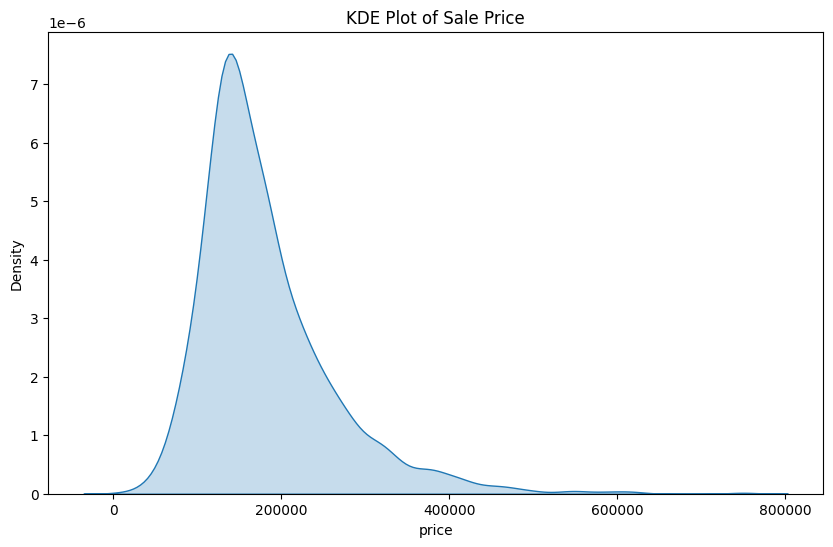

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


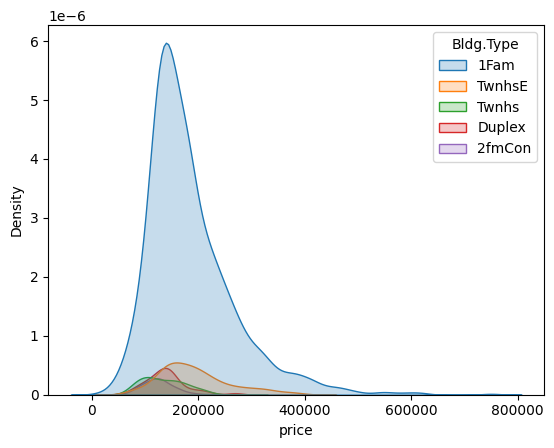

            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  


In [71]:
from scipy.stats import mstats

# Question 1
df = pd.read_csv('data/ames_prices.csv')

# Question 2
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], fill=True)
plt.title('KDE Plot of Sale Price')
plt.show()

print(df['price'].describe())

sns.kdeplot(data=df, x='price', hue='Bldg.Type', fill=True)
plt.show()
print(df.groupby('Bldg.Type')['price'].describe())

On average, end-of-unit townhouses are the most expensive and single family homes have the highest transaction price variance.

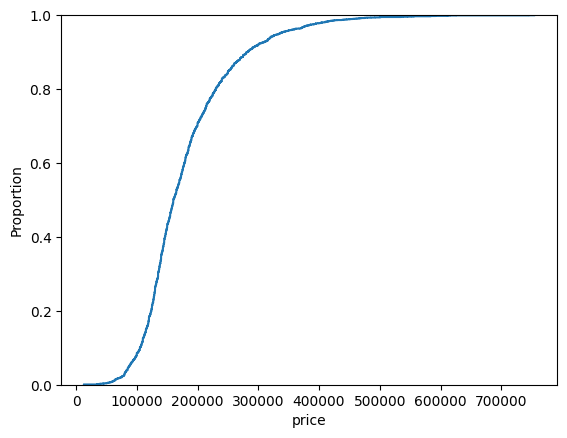

0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64


In [34]:
# Question 3
sns.ecdfplot(df['price'])
plt.show()
print(df['price'].quantile([0, 0.25, 0.5, 0.75, 1]))

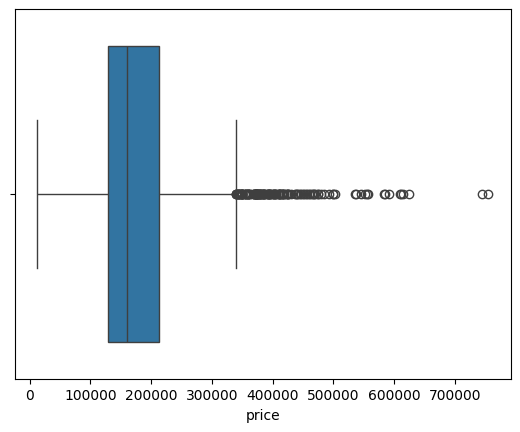

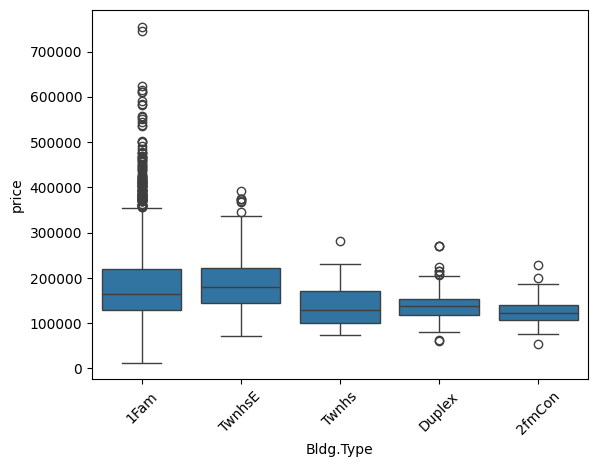

In [35]:
# Question 4
sns.boxplot(x=df['price'])
plt.show()

sns.boxplot(data=df, x='Bldg.Type', y='price')
plt.xticks(rotation=45)
plt.show()

There are a lot of outliers on the higher end of the range. Single family homes have overall the most outliers. The variance is shown clearly in box plots. Single family homes have the most variances while two family conversion homes have the least variance.

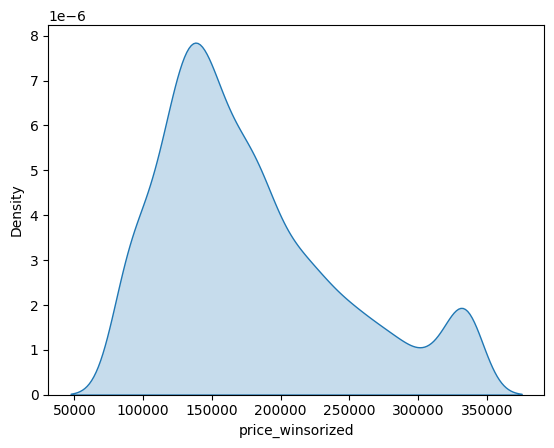

count      2930.000000
mean     177632.528669
std       66195.453960
min       87500.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      335000.000000
Name: price_winsorized, dtype: float64


/Users/pavigupta/Documents/Machine Learning I/.venv/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:4786: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [37]:
# Question 5
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df['is_outlier'] = ((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))).astype(int)

# Question 6
df['price_winsorized'] = mstats.winsorize(df['price'], limits=[0.05, 0.05])
sns.kdeplot(df['price_winsorized'], fill=True)
plt.show()
print(df['price_winsorized'].describe())

By winsoring the price variable, we replaced the outliers with the next closest non-outlier number, meaning that the maximum isn't as high anymore. The graph now shows this as the distribution is less skewed.